In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_train = pd.read_csv("./input/cs-training.csv")
df_train.head()
# 数据概览
df_train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [4]:
age_down = df_train['age'].mean() - 3 * df_train['age'].std()
age_up = df_train['age'].mean() + 3 * df_train['age'].std()
print(f"age下限设为：{age_down}")
print(f"age上限设为：{age_up}")

age下限设为：7.979609077365616
age上限设为：96.61080425596771


<AxesSubplot:xlabel='age', ylabel='SeriousDlqin2yrs'>

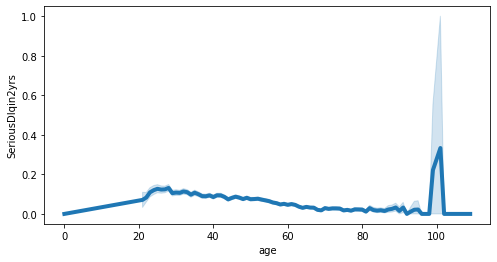

In [15]:
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

_, axes = plt.subplots(1, 1, figsize=(8,4))
sns.lineplot(df_train['age'],df_train['SeriousDlqin2yrs'],lw=4)


In [40]:
def bin_woe(tar, var, n=None):
    
    total_bad = tar.sum()
    total_good =tar.count()-total_bad
    totalRate = total_good/total_bad
    

    msheet = pd.DataFrame({tar.name:tar,var.name:var,'var_bins':pd.qcut(var, n, duplicates='drop')})
    grouped = msheet.groupby(['var_bins'])
    
    groupBad = grouped.sum()[tar.name]
    groupTotal = grouped.count()[tar.name]
    groupGood = groupTotal - groupBad
    groupRate = groupGood/groupBad
    groupBadRate = groupBad/groupTotal
    groupGoodRate = groupGood/groupTotal

    woe = np.log(groupRate/totalRate)
    iv = np.sum((groupGood/total_good-groupBad/total_bad)*woe)
    
    dictmap = {}
    for x in woe.index:
        dictmap[x] = woe[x]
    genervar, cut = var.map(dictmap), woe.index
    
    return woe, iv, cut, genervar
 

In [41]:
woe,iv,cut,genervar = bin_woe(df_train['SeriousDlqin2yrs'], df_train['age'],5)
print(woe.tolist())
print('______________')
print(iv)
print('______________')
print(cut)
print('______________')
print(genervar)

[-0.49659289366137954, -0.24692219665998896, -0.07273396131143318, 0.4327260133213886, 1.0637379266101183]
______________
0.2500393230671014
______________
CategoricalIndex([(-0.001, 39.0], (39.0, 48.0], (48.0, 56.0], (56.0, 65.0],
                  (65.0, 109.0]],
                 categories=[(-0.001, 39.0], (39.0, 48.0], (48.0, 56.0], (56.0, 65.0], (65.0, 109.0]], ordered=True, dtype='category', name='var_bins')
______________
0        -0.246922
1        -0.246922
2        -0.496593
3        -0.496593
4        -0.072734
            ...   
149995    1.063738
149996   -0.246922
149997    0.432726
149998   -0.496593
149999    0.432726
Name: age, Length: 150000, dtype: float64
